In [1]:
!pip install matplotlib seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.DataFrame({
    'Liczby': np.random.randn(100),
    'X': np.random.rand(100),
    'Y': np.random.rand(100),
    'Kategorie': ['A', 'B', 'C', 'A', 'B'] * 20,
    'Wartość': np.random.randint(1, 10, size=100)
})

data

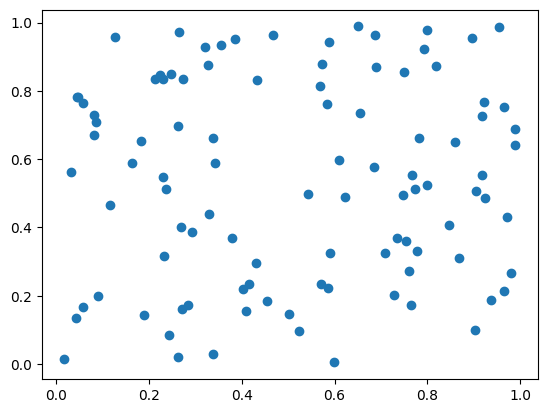

In [10]:
# wykres punktowy
plt.scatter(data['X'], data['Y'])
plt.show()

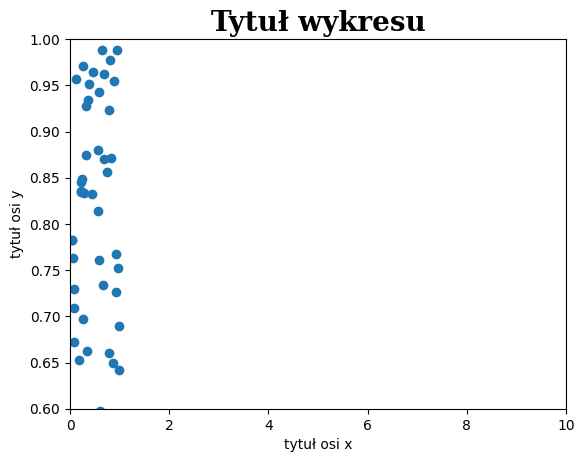

In [22]:
# wykres punktowy
plt.scatter(data['X'], data['Y'])

# tytuł wykresu
plt.title("Tytuł wykresu", fontsize=20, fontfamily='serif', fontweight='bold')
plt.xlabel("tytuł osi x")
plt.ylabel("tytuł osi y")

# przeskalowanie osi
plt.xlim(0, 10)
plt.ylim(0.6, 1)

plt.show()


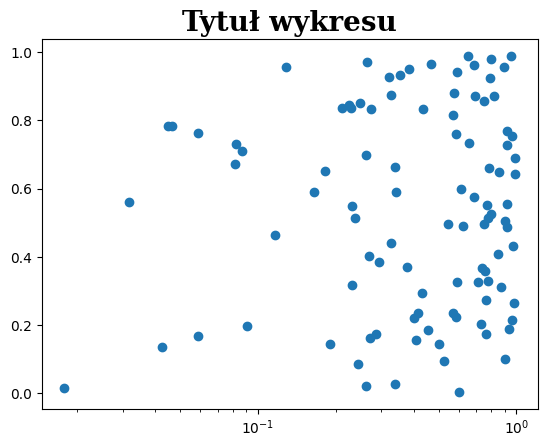

In [24]:
plt.scatter(data['X'], data['Y'])

plt.title("Tytuł wykresu", fontsize=20, fontfamily='serif', fontweight='bold')

# inna skala dla osi
plt.xscale("log")

plt.show()

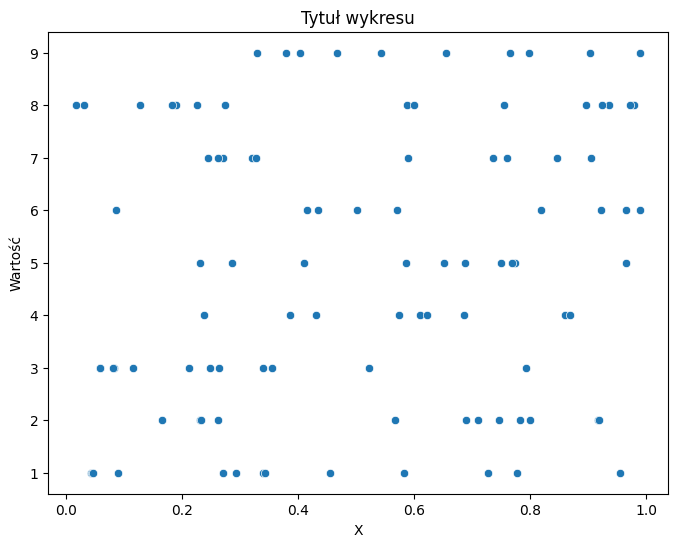

In [32]:
# to samo w seaborn
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='X', y='Wartość')
plt.title("Tytuł wykresu")
plt.show()

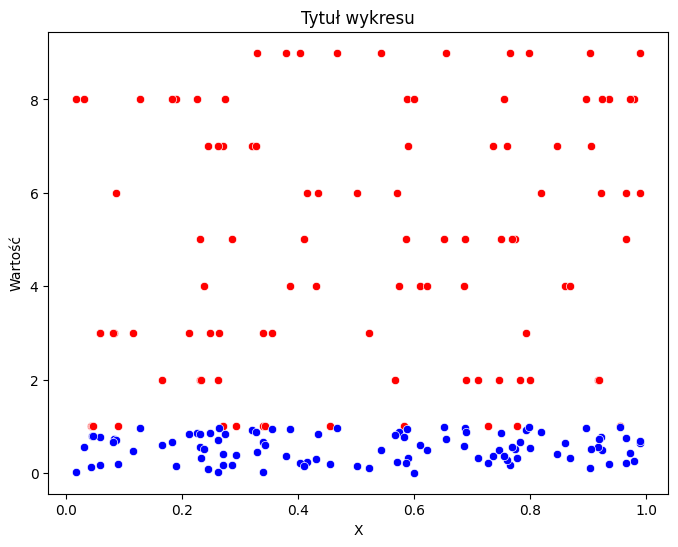

In [34]:
# to samo w seaborn
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='X', y='Wartość', color='red')
sns.scatterplot(data=data, x='X', y='Y', color='blue')
plt.title("Tytuł wykresu")
plt.show()

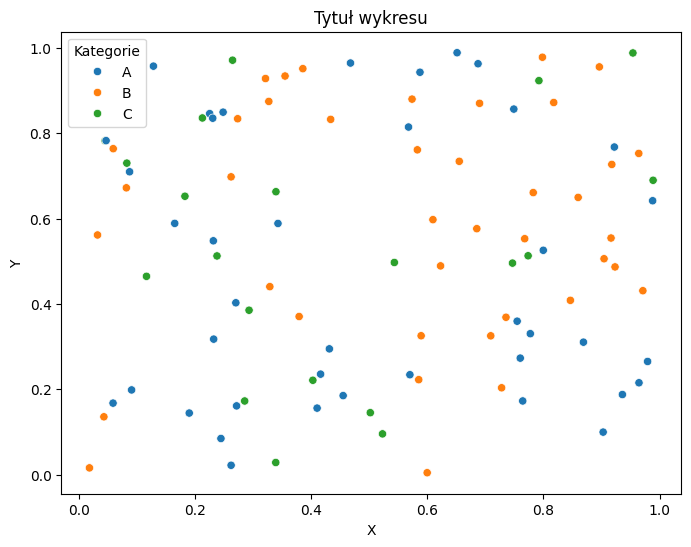

In [36]:
# kolor zależny od wartości w kolumnie
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='X', y='Y', hue='Kategorie')
plt.title("Tytuł wykresu")
plt.show()

In [37]:
# kod z poprzeniego notatnika - złączone dane z GUS
gestosc = pd.read_excel("LUDN_2425_XPIV_20251022120949.xlsx", sheet_name='DANE', dtype={'Kod':str})
plec = pd.read_excel("LUDN_2137_XPIV_20251022121246.xlsx", sheet_name='DANE', dtype={'Kod':str})
plec_pivot = pd.pivot_table(plec[['Kod', 'Płeć', 'Wartosc']], index='Kod', columns='Płeć', values='Wartosc').reset_index()
plec_pivot['razem'] = plec_pivot['kobiety'] + plec_pivot['mężczyźni']
plec_pivot['procent_kobiety'] = plec_pivot['kobiety'] / plec_pivot['razem']
plec_pivot['procent_mężczyźni'] = plec_pivot['mężczyźni'] / plec_pivot['razem']
scalone = pd.merge(gestosc, plec_pivot, how='left', left_on='Kod', right_on='Kod')
scalone

,Kod,Nazwa,Wskaźniki,Rok,Wartosc,Jednostka miary,Atrybut,kobiety,mężczyźni,razem,procent_kobiety,procent_mężczyźni
0,0201011,Bolesławiec (1),ludność na 1 km2,2024,1610.3,osoba,,19713.0,17082.0,36795.0,0.535752,0.464248
1,0201022,Bolesławiec (2),ludność na 1 km2,2024,53.1,osoba,,7688.0,7671.0,15359.0,0.500553,0.499447
2,0201032,Gromadka (2),ludność na 1 km2,2024,18.6,osoba,,2481.0,2497.0,4978.0,0.498393,0.501607
3,0201043,Nowogrodziec (3),ludność na 1 km2,2024,82.2,osoba,,7289.0,7234.0,14523.0,0.501894,0.498106
4,0201044,Nowogrodziec - miasto (4),ludność na 1 km2,2024,251.6,osoba,,2060.0,1990.0,4050.0,0.508642,0.491358
...,...,...,...,...,...,...,...,...,...,...,...,...
3912,3218054,Węgorzyno - miasto (4),ludność na 1 km2,2024,378.1,osoba,,1346.0,1244.0,2590.0,0.519691,0.480309
3913,3218055,Węgorzyno - obszar wiejski (5),ludność na 1 km2,2024,14.7,osoba,,1769.0,1888.0,3657.0,0.483730,0.516270
3914,3261011,Koszalin (1),ludność na 1 km2,2024,997.1,osoba,,55803.0,49460.0,105263.0,0.530129,0.469871
3915,3262011,Szczecin (1),ludność na 1 km2,2024,1286.4,osoba,,203749.0,182957.0,386706.0,0.526883,0.473117


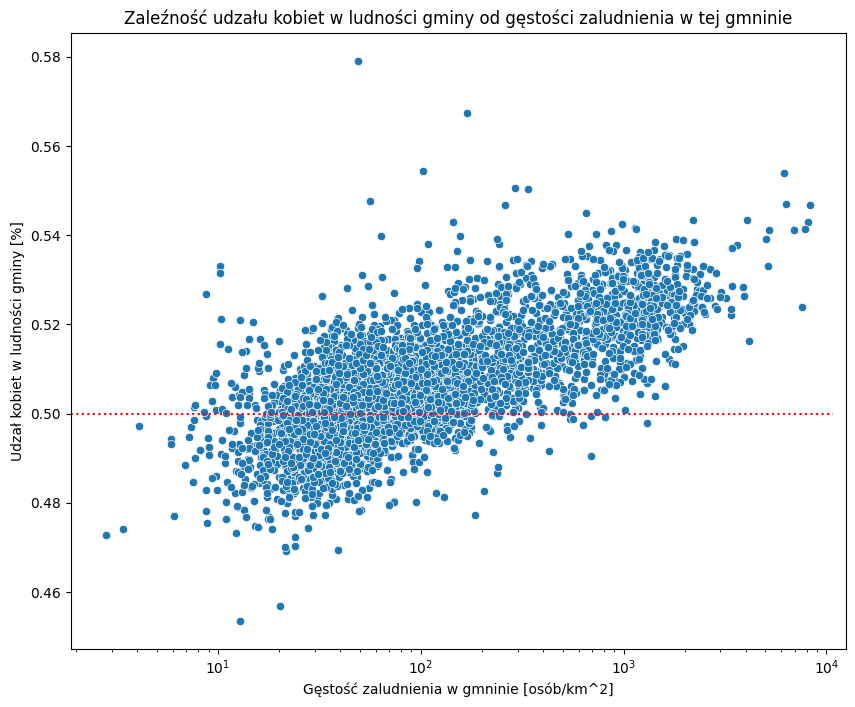

In [50]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=scalone, x='Wartosc', y='procent_kobiety')
plt.title("Zaleźność udzału kobiet w ludności gminy od gęstości zaludnienia w tej gmninie")
plt.xlabel("Gęstość zaludnienia w gmninie [osób/km^2]")
plt.ylabel("Udzał kobiet w ludności gminy [%]")
plt.xscale("log")
plt.hlines(y=0.5, xmin=0, xmax=1.3*scalone['Wartosc'].max(), color='red', linestyles="dotted")
plt.savefig("wykres.png", dpi=600)
plt.show()

In [65]:
# wykres liniowy

# wykorzystamy dane o rowerach

rowery_df = pd.read_csv("rowery/wynik.csv",
                        usecols=['name', 'free_bikes', 'datetime', 'hour'],
                        parse_dates=['datetime']
                       )
pierwsze_df = rowery_df.sort_values('datetime').groupby(['name', 'hour'], as_index=False).first()
pierwsze_df

,name,hour,free_bikes,datetime
0,1 Sierpnia – DK Włochy,0,10,2025-10-20 00:00:36.655373
1,1 Sierpnia – DK Włochy,1,10,2025-10-20 01:00:40.042541
2,1 Sierpnia – DK Włochy,2,10,2025-10-20 02:00:35.038174
3,1 Sierpnia – DK Włochy,3,10,2025-10-20 03:00:35.928188
4,1 Sierpnia – DK Włochy,4,10,2025-10-20 04:00:41.380497
...,...,...,...,...
8251,Żwirki i Wigury - Woronicza,19,6,2025-10-20 19:00:32.898481
8252,Żwirki i Wigury - Woronicza,20,5,2025-10-20 20:00:35.905749
8253,Żwirki i Wigury - Woronicza,21,8,2025-10-20 21:00:43.372657
8254,Żwirki i Wigury - Woronicza,22,8,2025-10-20 22:00:39.369029


In [3]:
pierwsze_df['max_free_bikes'] = pierwsze_df.groupby('name')['free_bikes'].transform('max')
pierwsze_df

,name,hour,free_bikes,datetime,max_free_bikes
0,1 Sierpnia – DK Włochy,0,10,2025-10-20 00:00:36.655373,13
1,1 Sierpnia – DK Włochy,1,10,2025-10-20 01:00:40.042541,13
2,1 Sierpnia – DK Włochy,2,10,2025-10-20 02:00:35.038174,13
3,1 Sierpnia – DK Włochy,3,10,2025-10-20 03:00:35.928188,13
4,1 Sierpnia – DK Włochy,4,10,2025-10-20 04:00:41.380497,13
...,...,...,...,...,...
8251,Żwirki i Wigury - Woronicza,19,6,2025-10-20 19:00:32.898481,15
8252,Żwirki i Wigury - Woronicza,20,5,2025-10-20 20:00:35.905749,15
8253,Żwirki i Wigury - Woronicza,21,8,2025-10-20 21:00:43.372657,15
8254,Żwirki i Wigury - Woronicza,22,8,2025-10-20 22:00:39.369029,15


In [4]:
max_rowerow = pierwsze_df[['name', 'max_free_bikes']].drop_duplicates()['max_free_bikes'].sum()
max_rowerow

np.int64(5198)

In [5]:
rowery_po_godzinach = pierwsze_df.groupby('hour', as_index=False).aggregate({'free_bikes':'sum'})
rowery_po_godzinach['riding_bikes'] = max_rowerow - rowery_po_godzinach['free_bikes']
rowery_po_godzinach

,hour,free_bikes,riding_bikes
0,0,3383,1815
1,1,3393,1805
2,2,3407,1791
3,3,3403,1795
4,4,3382,1816
5,5,3367,1831
6,6,3285,1913
7,7,3267,1931
8,8,3290,1908
9,9,3269,1929


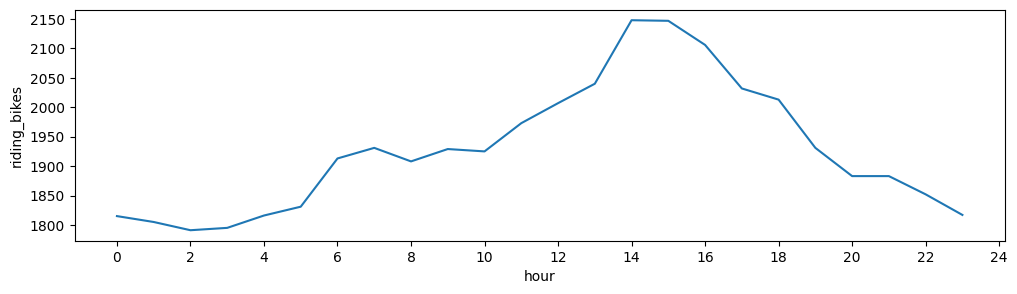

In [6]:
# wykres liniowy
plt.figure(figsize=(12,3))
sns.lineplot(data=rowery_po_godzinach, x='hour', y='riding_bikes')
plt.xticks(np.linspace(0, 24, 13))
plt.show()

In [7]:
rowery_df.dtypes

name                  object
free_bikes             int64
datetime      datetime64[ns]
hour                   int64
dtype: object

<Axes: xlabel='hour', ylabel='free_bikes'>

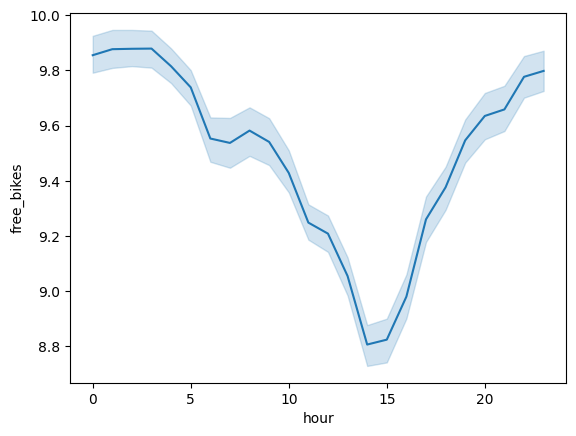

In [8]:
sns.lineplot(rowery_df, x='hour', y='free_bikes')

In [9]:
rowery_df.dtypes

name                  object
free_bikes             int64
datetime      datetime64[ns]
hour                   int64
dtype: object

In [10]:
rowery_df.describe()

,free_bikes,datetime,hour
count,495360.000000,495360,495360.000000
mean,9.493867,2025-10-20 11:58:09.720999168,11.500000
min,0.000000,2025-10-19 23:57:33.667841,0.000000
25%,6.000000,2025-10-20 05:57:39.778839040,5.750000
50%,9.000000,2025-10-20 11:57:38.719816960,11.500000
75%,12.000000,2025-10-20 17:57:41.281108992,17.250000
max,78.000000,2025-10-20 23:57:39.399254,23.000000
std,5.635046,NaN,6.922194


In [14]:
import matplotlib.dates as mdates # dla formatowania ticks z daty

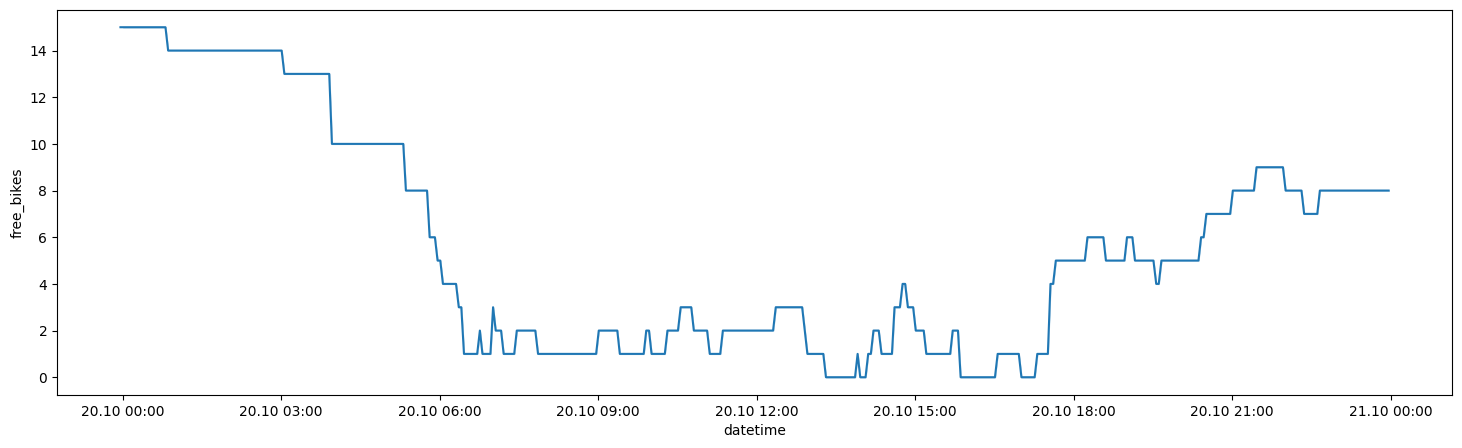

In [19]:
fig, ax = plt.subplots(figsize=(18,5))

sns.lineplot(rowery_df[rowery_df['name'] == 'Żwirki i Wigury - Woronicza'],
             x='datetime',
             y='free_bikes')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m %H:%M'))

plt.show()

In [21]:
# wykres słupkowy

data

,Liczby,X,Y,Kategorie,Wartość
0,1.023894,0.539150,0.864938,A,9
1,-1.041476,0.530436,0.559194,B,2
2,0.883581,0.031595,0.670888,C,3
3,0.335778,0.955020,0.531576,A,3
4,0.422734,0.322059,0.240968,B,6
...,...,...,...,...,...
95,1.274887,0.077588,0.611035,A,6
96,0.724577,0.988484,0.438636,B,8
97,0.090390,0.245084,0.651542,C,6
98,1.264438,0.442076,0.408067,A,6


In [26]:
data.groupby('Kategorie').aggregate({"Wartość": "mean"})

,Wartość
Kategorie,
A,5.15
B,4.80
C,4.85


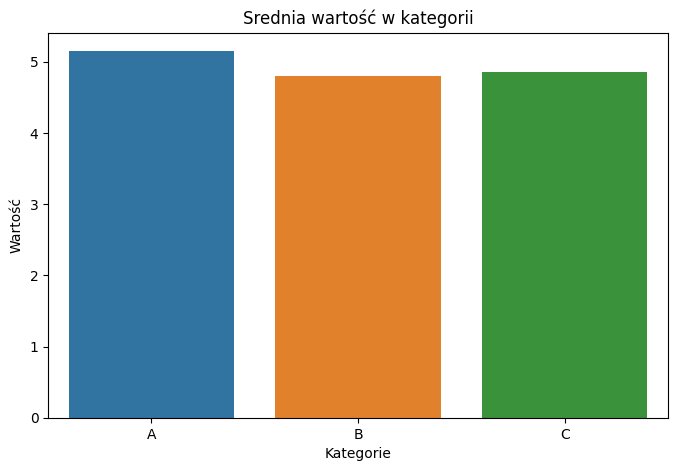

In [29]:
plt.figure(figsize=(8,5))
sns.barplot(data.groupby('Kategorie').aggregate({"Wartość": "mean"}),
            x='Kategorie', y='Wartość',
           hue='Kategorie')
plt.title("Srednia wartość w kategorii")
plt.show()

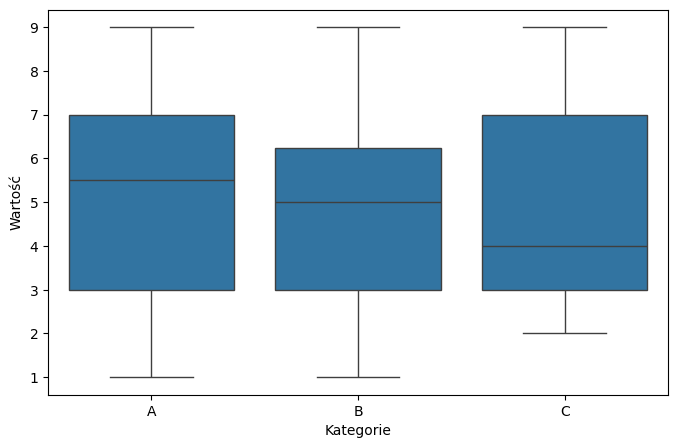

In [24]:
# wykres pudełkowy -> https://pl.wikipedia.org/wiki/Wykres_pude%C5%82kowy

plt.figure(figsize=(8,5))
sns.boxplot(data, x='Kategorie', y='Wartość')
plt.show()

<Axes: xlabel='Wartość', ylabel='Count'>

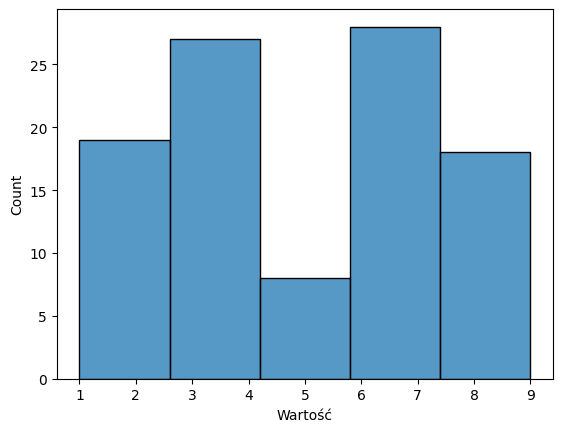

In [34]:
sns.histplot(data, x='Wartość', bins=5) # histogram z 5 przedziałami

In [35]:
# heatmapa

In [38]:
rowery_df = pd.read_csv("rowery/wynik.csv", usecols=['name', 'free_bikes', 'datetime', 'hour'])
rowery_df = rowery_df[rowery_df['name'].str.lower().str.contains('marszałkowska')]
pierwsze_df = rowery_df.sort_values('datetime').groupby(['name', 'hour'], as_index=False).first()
wynik_df = pd.pivot_table(pierwsze_df, columns='hour', index='name', values='free_bikes')
wynik_df

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
name,,,,,,,,,,,,,,,,,,,,,
Marszałkowska - Al. Jerozolimskie,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,...,2.0,5.0,4.0,4.0,3.0,3.0,2.0,2.0,1.0,1.0
Marszałkowska - Hoża,4.0,4.0,4.0,4.0,4.0,5.0,4.0,3.0,3.0,2.0,...,16.0,16.0,11.0,7.0,8.0,6.0,7.0,7.0,8.0,4.0
Marszałkowska - Królewska,6.0,6.0,6.0,6.0,6.0,6.0,6.0,3.0,2.0,2.0,...,8.0,11.0,10.0,6.0,6.0,4.0,4.0,4.0,4.0,6.0
Marszałkowska - Litewska,10.0,10.0,10.0,10.0,10.0,10.0,11.0,12.0,12.0,12.0,...,9.0,4.0,0.0,2.0,3.0,4.0,4.0,4.0,4.0,10.0


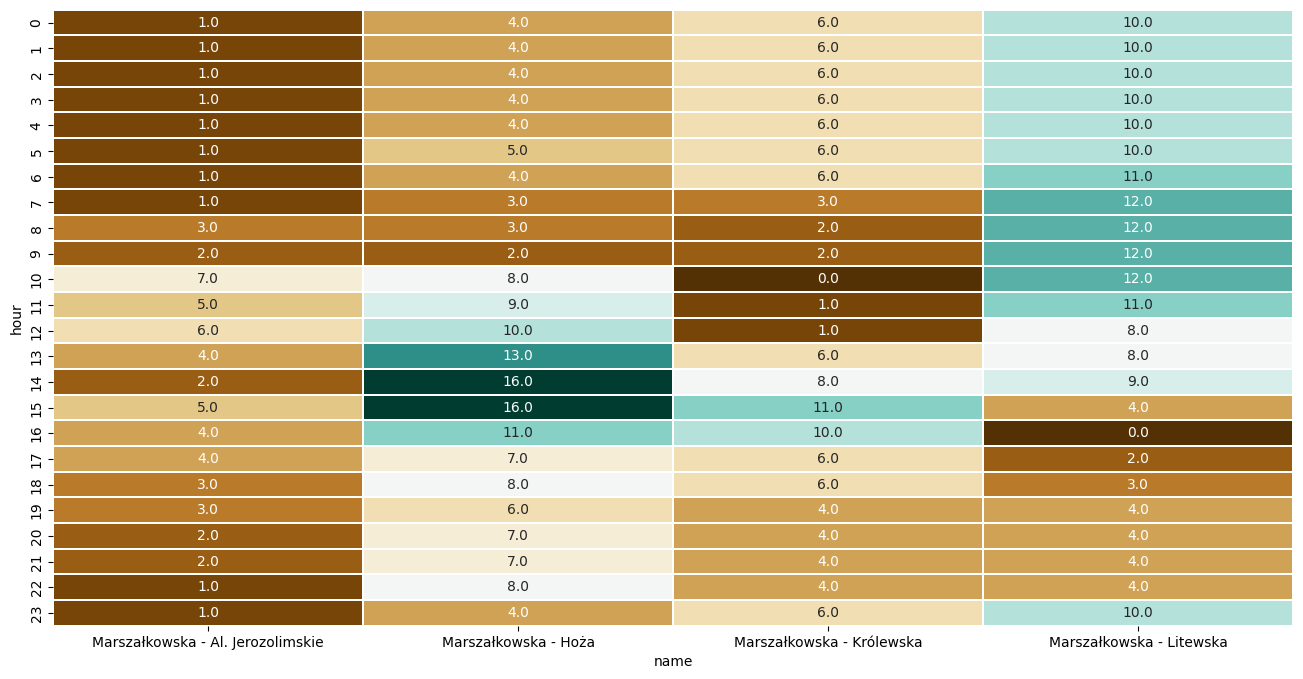

In [50]:
plt.figure(figsize=(16,8))
sns.heatmap(wynik_df.T,
            linecolor='white', linewidths=0.1, # obramowania kratek
            fmt=".1f", annot=True, # wartość wpisana w kratkę
            cbar=False, # czy pokazać legendę
            cmap='BrBG' # skala kolorów -> zobacz https://colorbrewer2.org/
           )
plt.show()

In [57]:
# pandas - funkcje związane z czasem

# rowery_df['datetime'] = pd.to_datetime(rowery_df['datetime'])

In [78]:
rowery_df['datetime_round'] = rowery_df['datetime'].dt.floor('2min')
rowery_df

,name,free_bikes,datetime,hour,datetime_round
0,al. Niepodległości - Batorego,21,2025-10-19 23:57:33.672212,23,2025-10-19 23:56:00
1,Marymoncka - Dewajtis,13,2025-10-19 23:57:33.667969,23,2025-10-19 23:56:00
2,Metro Centrum Nauki Kopernik,27,2025-10-19 23:57:33.697936,23,2025-10-19 23:56:00
3,Darwina - Nusbauma-Hilarowicza,11,2025-10-19 23:57:33.696712,23,2025-10-19 23:56:00
4,al. Jerozolimskie - Lindleya,10,2025-10-19 23:57:33.670933,23,2025-10-19 23:56:00
...,...,...,...,...,...
495355,al. Jerozolimskie - Krucza,1,2025-10-20 23:57:39.393682,23,2025-10-20 23:56:00
495356,Rembielińska - Wyszogrodzka,23,2025-10-20 23:57:39.396460,23,2025-10-20 23:56:00
495357,Plac Grzybowski,4,2025-10-20 23:57:39.345487,23,2025-10-20 23:56:00
495358,Sosnkowskiego - OSiR Ursus,12,2025-10-20 23:57:39.395220,23,2025-10-20 23:56:00


In [72]:
rowery_df['datetime_round'].values[1]

np.datetime64('2025-10-20T00:00:00.000000000')

In [84]:
rowery_df['free_bikes'].rolling(3).max()

0          NaN
1          NaN
2         27.0
3         27.0
4         27.0
          ... 
495355    30.0
495356    23.0
495357    23.0
495358    23.0
495359    15.0
Name: free_bikes, Length: 495360, dtype: float64

In [96]:
np.max([1,3,4])

np.int64(4)

In [95]:
max([1,3,4])

4

In [ ]:
from numpy import *
from pandas import *


In [ ]:
funkcja


In [93]:
import math
import statistics

In [97]:
statistics.mean([1,3,4])

2.6666666666666665

In [102]:
rowery_df.groupby('hour').aggregate({'free_bikes': "math.sin"})

AttributeError: 'SeriesGroupBy' object has no attribute 'math.sin'

In [1]:
from moj_pakiet import moja_funkcja

In [2]:
moja_funkcja()

TypeError: print() takes 0 positional arguments but 1 was given

In [1]:
print("napis")

napis


In [2]:
print = 10

In [3]:
print("drugi napis")

TypeError: 'int' object is not callable